In [1]:
import pandas as pd
import seaborn as sb

In [2]:
train = pd.read_csv("train.csv")

# EDA

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

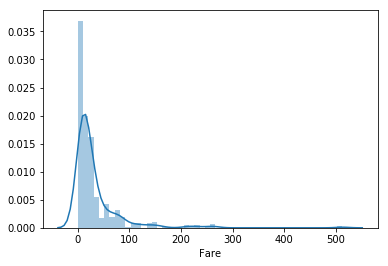

In [6]:
sb.distplot(train["Fare"])

In [7]:
train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [9]:
import numpy as np
for i in range(len(train["Fare"])):
    if train["Fare"].iloc()[i] < 1:
        train["Fare"].iloc()[i] = 1

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


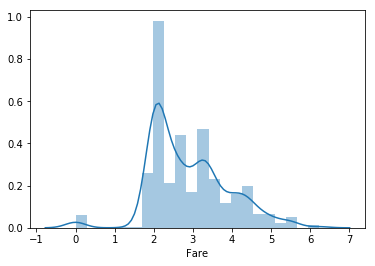

In [10]:
train["Fare"] = pd.Series(np.log(train["Fare"]))
sb.distplot(train["Fare"])

In [11]:
train["Cabin"].isna().sum()

687

In [12]:
train["Cabin"].size

891

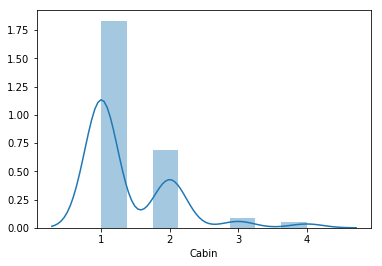

In [13]:
sb.distplot(train["Cabin"].value_counts())

In [14]:
print("Null value percentage for Cabin column is: %" + str(train["Cabin"].isna().sum()* 100/ train["Cabin"].size))

Null value percentage for Cabin column is: %77.10437710437711


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


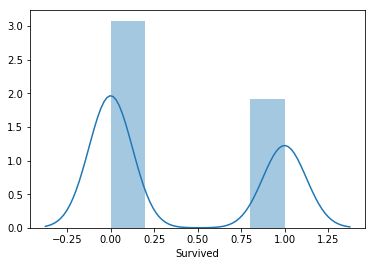

In [16]:
sb.distplot(train["Survived"])

In [17]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

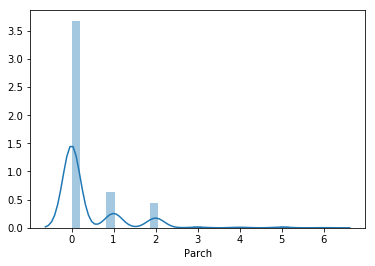

In [19]:
sb.distplot(train["Parch"])

In [20]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

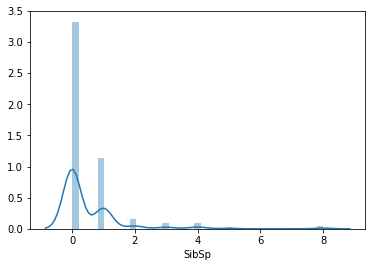

In [21]:
sb.distplot(train["SibSp"])

In [24]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
train["Age"].round().describe()

count    714.000000
mean      29.693277
std       14.524527
min        0.000000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
train["Age"] = train["Age"].round()

In [27]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [28]:
train["Age"].describe()

count    891.000000
mean      29.693277
std       13.000252
min        0.000000
25%       22.000000
50%       29.693277
75%       35.000000
max       80.000000
Name: Age, dtype: float64

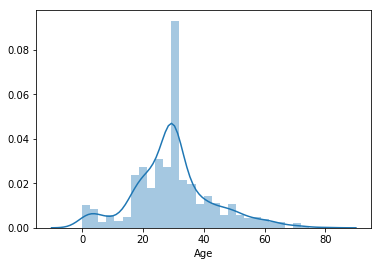

In [29]:
sb.distplot(train["Age"])

In [30]:
train["Name"].value_counts() 
#Since names are highly unlikely to have any significance with the problem,
# we will drop this column.

Quick, Mrs. Frederick Charles (Jane Richards)              1
Lines, Miss. Mary Conover                                  1
Skoog, Mr. Wilhelm                                         1
Frolicher, Miss. Hedwig Margaritha                         1
Graham, Mrs. William Thompson (Edith Junkins)              1
Cook, Mr. Jacob                                            1
Harris, Mr. George                                         1
Hood, Mr. Ambrose Jr                                       1
Betros, Mr. Tannous                                        1
Ling, Mr. Lee                                              1
Becker, Master. Richard F                                  1
Jensen, Mr. Niels Peder                                    1
Giles, Mr. Frederick Edward                                1
Yousif, Mr. Wazli                                          1
Hakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)       1
Peter, Miss. Anna                                          1
Shorney, Mr. Charles Jos

In [31]:
train.drop(["Name"], axis=1, inplace = True)

In [32]:
#We need to convert some columns to type of objects, because they 
#represent categorical variables, e.g. Pclass
train["Pclass"] = train["Pclass"].astype("object")
train["SibSp"] = train["SibSp"].astype("object")
train["Parch"] = train["Parch"].astype("object")

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null object
Parch          891 non-null object
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 76.6+ KB


In [34]:
#Lets also drop Cabin column since it has many null values.
train.drop(["Cabin"], axis=1, inplace = True)

In [35]:
label = pd.get_dummies(pd.Series(train["Survived"], dtype='object'))
train.drop(["Survived"], axis = 1, inplace = True)

In [36]:
train.head(10) 

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,male,22.000000,1,0,A/5 21171,1.981001,S
1,2,1,female,38.000000,1,0,PC 17599,4.266662,C
2,3,3,female,26.000000,0,0,STON/O2. 3101282,2.070022,S
3,4,1,female,35.000000,1,0,113803,3.972177,S
4,5,3,male,35.000000,0,0,373450,2.085672,S
5,6,3,male,29.693277,0,0,330877,2.135148,Q
6,7,1,male,54.000000,0,0,17463,3.948596,S
7,8,3,male,2.000000,3,1,349909,3.048088,S
8,9,3,female,27.000000,0,2,347742,2.409941,S
9,10,2,female,14.000000,1,0,237736,3.403555,C


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Pclass         891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null object
Parch          891 non-null object
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 62.7+ KB


In [38]:
train.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# Test set conversions

In [39]:
test = pd.read_csv("test.csv")
test["Pclass"] = test["Pclass"].astype("object")
test["SibSp"] = test["SibSp"].astype("object")
test["Parch"] = test["Parch"].astype("object")
test.drop(["Cabin"], axis=1, inplace = True)
test.drop(["Name"], axis=1, inplace = True)
test["Age"] = test["Age"].round()
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

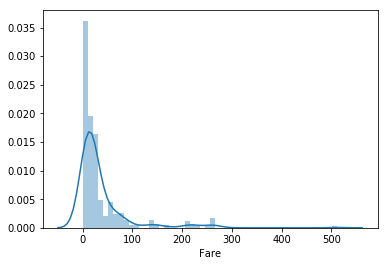

In [40]:
sb.distplot(test["Fare"])

In [41]:
for i in range(len(test["Fare"])):
    if test["Fare"].iloc()[i] < 1:
        test["Fare"].iloc()[i] = 1
test["Fare"] = pd.Series(np.log(test["Fare"]))


/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


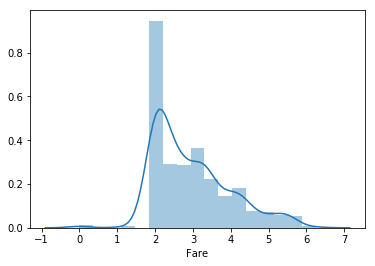

In [42]:
sb.distplot(test["Fare"])

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null object
Parch          418 non-null object
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 29.5+ KB


In [44]:
train['train'] = 1
test['train'] = 0
combined = pd.concat([train, test])

tickets = combined["Ticket"]
combined.drop(["Ticket"], axis = 1, inplace = True)

df = pd.get_dummies(combined, columns = list(combined.select_dtypes(include='object')))

train = df[df['train'] == 1]
test = df[df['train'] == 0]
    
train.drop(["train"], axis = 1, inplace = True)
test.drop(["train"], axis = 1, inplace = True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


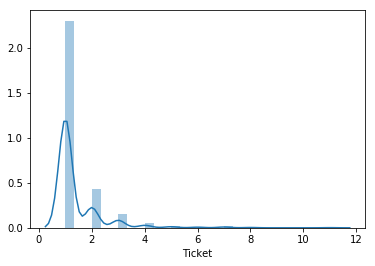

In [45]:
sb.distplot(tickets.value_counts())

In [46]:
(tickets.value_counts() == 1).sum()

713

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 26 columns):
PassengerId    891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Pclass_1       891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
SibSp_0        891 non-null uint8
SibSp_1        891 non-null uint8
SibSp_2        891 non-null uint8
SibSp_3        891 non-null uint8
SibSp_4        891 non-null uint8
SibSp_5        891 non-null uint8
SibSp_8        891 non-null uint8
Parch_0        891 non-null uint8
Parch_1        891 non-null uint8
Parch_2        891 non-null uint8
Parch_3        891 non-null uint8
Parch_4        891 non-null uint8
Parch_5        891 non-null uint8
Parch_6        891 non-null uint8
Parch_9        891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes:

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 26 columns):
PassengerId    418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Pclass_1       418 non-null uint8
Pclass_2       418 non-null uint8
Pclass_3       418 non-null uint8
Sex_female     418 non-null uint8
Sex_male       418 non-null uint8
SibSp_0        418 non-null uint8
SibSp_1        418 non-null uint8
SibSp_2        418 non-null uint8
SibSp_3        418 non-null uint8
SibSp_4        418 non-null uint8
SibSp_5        418 non-null uint8
SibSp_8        418 non-null uint8
Parch_0        418 non-null uint8
Parch_1        418 non-null uint8
Parch_2        418 non-null uint8
Parch_3        418 non-null uint8
Parch_4        418 non-null uint8
Parch_5        418 non-null uint8
Parch_6        418 non-null uint8
Parch_9        418 non-null uint8
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
dtypes:

In [49]:
train.drop(["PassengerId"], axis = 1, inplace = True)
passengerIdTest = test["PassengerId"]
test.drop(["PassengerId"], axis = 1, inplace = True)

In [50]:
#Normalizing the data
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#train = sc.fit_transform(train)
#test = sc.fit_transform(test)

# Modelling Time

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,label,test_size=0.25,random_state=0)

In [52]:
#add DL here
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers

# Neural network
model = Sequential()
model.add(Dense(25, input_dim=25, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

Using TensorFlow backend.


In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 250)
###FOR TRAIN AND VALIDATION, USE HERE!
#history = model.fit(X_train, y_train, epochs=1000, batch_size=64, callbacks=[es])
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=500,  batch_size=128, callbacks=[es])
###FOR INFERENCE, USE THIS LINE!
#history = model.fit(train, label, epochs=100,  batch_size=64, callbacks=[es])

Train on 668 samples, validate on 223 samples
Epoch 1/500
668/668 [==============================] - 0s 223us/step - loss: 1.2645 - accuracy: 0.4880 - val_loss: 1.1077 - val_accuracy: 0.6233
Epoch 2/500
668/668 [==============================] - 0s 15us/step - loss: 1.0703 - accuracy: 0.6198 - val_loss: 0.9529 - val_accuracy: 0.6256
Epoch 3/500
668/668 [==============================] - 0s 28us/step - loss: 0.9162 - accuracy: 0.6183 - val_loss: 0.8158 - val_accuracy: 0.6256
Epoch 4/500
668/668 [==============================] - 0s 21us/step - loss: 0.7821 - accuracy: 0.6183 - val_loss: 0.7288 - val_accuracy: 0.6278
Epoch 5/500
668/668 [==============================] - 0s 21us/step - loss: 0.7138 - accuracy: 0.6198 - val_loss: 0.6864 - val_accuracy: 0.6300
Epoch 6/500
668/668 [==============================] - 0s 24us/step - loss: 0.6816 - accuracy: 0.6257 - val_loss: 0.6735 - val_accuracy: 0.6368
Epoch 7/500
668/668 [==============================] - 0s 22us/step - loss: 0.6731 - accu

668/668 [==============================] - 0s 22us/step - loss: 0.6055 - accuracy: 0.6819 - val_loss: 0.5974 - val_accuracy: 0.6906
Epoch 58/500
668/668 [==============================] - 0s 16us/step - loss: 0.6024 - accuracy: 0.6894 - val_loss: 0.5930 - val_accuracy: 0.6951
Epoch 59/500
668/668 [==============================] - 0s 18us/step - loss: 0.5987 - accuracy: 0.6879 - val_loss: 0.5888 - val_accuracy: 0.6996
Epoch 60/500
668/668 [==============================] - 0s 17us/step - loss: 0.5951 - accuracy: 0.6984 - val_loss: 0.5846 - val_accuracy: 0.7130
Epoch 61/500
668/668 [==============================] - 0s 21us/step - loss: 0.5916 - accuracy: 0.7111 - val_loss: 0.5808 - val_accuracy: 0.7220
Epoch 62/500
668/668 [==============================] - 0s 17us/step - loss: 0.5880 - accuracy: 0.7171 - val_loss: 0.5765 - val_accuracy: 0.7287
Epoch 63/500
668/668 [==============================] - 0s 15us/step - loss: 0.5844 - accuracy: 0.7148 - val_loss: 0.5721 - val_accuracy: 0.722

668/668 [==============================] - 0s 16us/step - loss: 0.4982 - accuracy: 0.8189 - val_loss: 0.4858 - val_accuracy: 0.8094
Epoch 114/500
668/668 [==============================] - 0s 15us/step - loss: 0.4971 - accuracy: 0.8114 - val_loss: 0.4844 - val_accuracy: 0.8072
Epoch 115/500
668/668 [==============================] - ETA: 0s - loss: 0.5006 - accuracy: 0.79 - 0s 16us/step - loss: 0.4961 - accuracy: 0.8114 - val_loss: 0.4846 - val_accuracy: 0.8049
Epoch 116/500
668/668 [==============================] - 0s 17us/step - loss: 0.4952 - accuracy: 0.8144 - val_loss: 0.4839 - val_accuracy: 0.8072
Epoch 117/500
668/668 [==============================] - 0s 18us/step - loss: 0.4945 - accuracy: 0.8121 - val_loss: 0.4840 - val_accuracy: 0.8027
Epoch 118/500
668/668 [==============================] - 0s 17us/step - loss: 0.4943 - accuracy: 0.8091 - val_loss: 0.4834 - val_accuracy: 0.8072
Epoch 119/500
668/668 [==============================] - 0s 17us/step - loss: 0.4927 - accuracy:

Epoch 169/500
668/668 [==============================] - 0s 17us/step - loss: 0.4612 - accuracy: 0.8271 - val_loss: 0.4591 - val_accuracy: 0.8004
Epoch 170/500
668/668 [==============================] - 0s 15us/step - loss: 0.4602 - accuracy: 0.8256 - val_loss: 0.4588 - val_accuracy: 0.8094
Epoch 171/500
668/668 [==============================] - 0s 19us/step - loss: 0.4596 - accuracy: 0.8256 - val_loss: 0.4587 - val_accuracy: 0.8072
Epoch 172/500
668/668 [==============================] - 0s 18us/step - loss: 0.4586 - accuracy: 0.8256 - val_loss: 0.4604 - val_accuracy: 0.8094
Epoch 173/500
668/668 [==============================] - 0s 16us/step - loss: 0.4596 - accuracy: 0.8263 - val_loss: 0.4610 - val_accuracy: 0.8117
Epoch 174/500
668/668 [==============================] - 0s 19us/step - loss: 0.4580 - accuracy: 0.8263 - val_loss: 0.4583 - val_accuracy: 0.8139
Epoch 175/500
668/668 [==============================] - 0s 17us/step - loss: 0.4579 - accuracy: 0.8278 - val_loss: 0.4576 -

668/668 [==============================] - 0s 16us/step - loss: 0.4377 - accuracy: 0.8316 - val_loss: 0.4464 - val_accuracy: 0.8072
Epoch 226/500
668/668 [==============================] - 0s 15us/step - loss: 0.4380 - accuracy: 0.8293 - val_loss: 0.4463 - val_accuracy: 0.8072
Epoch 227/500
668/668 [==============================] - 0s 16us/step - loss: 0.4375 - accuracy: 0.8271 - val_loss: 0.4461 - val_accuracy: 0.8072
Epoch 228/500
668/668 [==============================] - 0s 17us/step - loss: 0.4382 - accuracy: 0.8263 - val_loss: 0.4454 - val_accuracy: 0.8072
Epoch 229/500
668/668 [==============================] - 0s 17us/step - loss: 0.4365 - accuracy: 0.8308 - val_loss: 0.4440 - val_accuracy: 0.8072
Epoch 230/500
668/668 [==============================] - 0s 19us/step - loss: 0.4362 - accuracy: 0.8331 - val_loss: 0.4442 - val_accuracy: 0.8072
Epoch 231/500
668/668 [==============================] - 0s 16us/step - loss: 0.4360 - accuracy: 0.8323 - val_loss: 0.4445 - val_accuracy:

Epoch 281/500
668/668 [==============================] - 0s 18us/step - loss: 0.4227 - accuracy: 0.8428 - val_loss: 0.4360 - val_accuracy: 0.8094
Epoch 282/500
668/668 [==============================] - 0s 18us/step - loss: 0.4228 - accuracy: 0.8391 - val_loss: 0.4386 - val_accuracy: 0.8072
Epoch 283/500
668/668 [==============================] - 0s 16us/step - loss: 0.4234 - accuracy: 0.8346 - val_loss: 0.4356 - val_accuracy: 0.8094
Epoch 284/500
668/668 [==============================] - 0s 22us/step - loss: 0.4214 - accuracy: 0.8436 - val_loss: 0.4361 - val_accuracy: 0.8117
Epoch 285/500
668/668 [==============================] - 0s 20us/step - loss: 0.4241 - accuracy: 0.8413 - val_loss: 0.4354 - val_accuracy: 0.8094
Epoch 286/500
668/668 [==============================] - 0s 18us/step - loss: 0.4213 - accuracy: 0.8413 - val_loss: 0.4351 - val_accuracy: 0.8072
Epoch 287/500
668/668 [==============================] - 0s 21us/step - loss: 0.4204 - accuracy: 0.8413 - val_loss: 0.4353 -

668/668 [==============================] - 0s 15us/step - loss: 0.4114 - accuracy: 0.8428 - val_loss: 0.4289 - val_accuracy: 0.8094
Epoch 338/500
668/668 [==============================] - 0s 21us/step - loss: 0.4104 - accuracy: 0.8428 - val_loss: 0.4309 - val_accuracy: 0.8049
Epoch 339/500
668/668 [==============================] - 0s 17us/step - loss: 0.4098 - accuracy: 0.8421 - val_loss: 0.4319 - val_accuracy: 0.8072
Epoch 340/500
668/668 [==============================] - 0s 17us/step - loss: 0.4100 - accuracy: 0.8421 - val_loss: 0.4295 - val_accuracy: 0.8094
Epoch 341/500
668/668 [==============================] - 0s 18us/step - loss: 0.4087 - accuracy: 0.8421 - val_loss: 0.4314 - val_accuracy: 0.8049
Epoch 342/500
668/668 [==============================] - 0s 17us/step - loss: 0.4090 - accuracy: 0.8421 - val_loss: 0.4324 - val_accuracy: 0.8049
Epoch 343/500
668/668 [==============================] - 0s 16us/step - loss: 0.4085 - accuracy: 0.8413 - val_loss: 0.4304 - val_accuracy:

668/668 [==============================] - 0s 17us/step - loss: 0.4008 - accuracy: 0.8428 - val_loss: 0.4276 - val_accuracy: 0.8072
Epoch 394/500
668/668 [==============================] - 0s 16us/step - loss: 0.4009 - accuracy: 0.8428 - val_loss: 0.4264 - val_accuracy: 0.8072
Epoch 395/500
668/668 [==============================] - 0s 16us/step - loss: 0.3998 - accuracy: 0.8443 - val_loss: 0.4271 - val_accuracy: 0.8072
Epoch 396/500
668/668 [==============================] - 0s 15us/step - loss: 0.4000 - accuracy: 0.8443 - val_loss: 0.4267 - val_accuracy: 0.8094
Epoch 397/500
668/668 [==============================] - 0s 16us/step - loss: 0.4006 - accuracy: 0.8436 - val_loss: 0.4283 - val_accuracy: 0.8049
Epoch 398/500
668/668 [==============================] - 0s 15us/step - loss: 0.4010 - accuracy: 0.8436 - val_loss: 0.4263 - val_accuracy: 0.8094
Epoch 399/500
668/668 [==============================] - 0s 16us/step - loss: 0.4025 - accuracy: 0.8428 - val_loss: 0.4292 - val_accuracy:

668/668 [==============================] - 0s 16us/step - loss: 0.3937 - accuracy: 0.8436 - val_loss: 0.4221 - val_accuracy: 0.8161
Epoch 450/500
668/668 [==============================] - 0s 16us/step - loss: 0.3930 - accuracy: 0.8421 - val_loss: 0.4242 - val_accuracy: 0.8117
Epoch 451/500
668/668 [==============================] - 0s 17us/step - loss: 0.3936 - accuracy: 0.8421 - val_loss: 0.4239 - val_accuracy: 0.8049
Epoch 452/500
668/668 [==============================] - 0s 18us/step - loss: 0.3937 - accuracy: 0.8428 - val_loss: 0.4228 - val_accuracy: 0.8049
Epoch 453/500
668/668 [==============================] - 0s 16us/step - loss: 0.3932 - accuracy: 0.8436 - val_loss: 0.4211 - val_accuracy: 0.8117
Epoch 454/500
668/668 [==============================] - 0s 18us/step - loss: 0.3930 - accuracy: 0.8428 - val_loss: 0.4214 - val_accuracy: 0.8139
Epoch 455/500
668/668 [==============================] - 0s 17us/step - loss: 0.3933 - accuracy: 0.8413 - val_loss: 0.4215 - val_accuracy:

In [54]:
import numpy as np
y_pred = model.predict(test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    #pred.append(1 if y_pred[i] > 0.5 else 0)

In [55]:
#For training part, change the one-hot encoding back to normal for y_test label data.
testy = list()
for i in range( len(y_test) ):
   testy.append(0 if y_test.iloc[i][0] == 1 else 1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(testy, pred)

# Data Preparation for Submission

In [57]:
import numpy as np
submission = pd.DataFrame({'PassengerId':passengerIdTest,'Survived':pred})
filename = 'submissionDL.csv'
submission.to_csv(filename,index=False)

In [58]:
pred

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


In [ ]:
#Kaggle inference result is 0.79425